In [30]:
!pip install tensorflow

In [31]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


file_path = '/content/drive/MyDrive/Uapp/Location.csv'  # Sesuaikan dengan lokasi file Anda
data = pd.read_csv(file_path)

df = data.copy()

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41686 entries, 0 to 41685
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   41686 non-null  object 
 1   Month      41686 non-null  int64  
 2   Year       41686 non-null  int64  
 3   Season     41686 non-null  object 
 4   Address    41686 non-null  object 
 5   Latitude   41686 non-null  float64
 6   Longitude  41686 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.2+ MB


In [32]:
display(df.head(10))
print("\n")
display(df.tail(10))
print("\n")
display(df.describe())
print("\n")
columns_to_display = ['Location', 'Month', 'Year', 'Season']
print("\nUnique Values per Selected Column:")
for column in columns_to_display:
    unique_values = df[column].unique().ravel()
    display(f"{column}: {unique_values}")
    display(f"Jumlah unique {column}: {len(unique_values)}")


Location  Month  Year  Season  \
0              Las Vegas, Nevada     10  2019    Fall   
1              Index, Washington     10  2019    Fall   
2             Golden Gate Bridge     10  2019    Fall   
3         New Orleans, Louisiana      8  2019  Summer   
4  Seven Magic Mountains, Nevada     10  2019    Fall   
5                Monument Valley     10  2019    Fall   
6          The Lodge on Route 66      9  2019    Fall   
7           Chesapeake, Virginia     10  2019    Fall   
8                SoHo, Manhattan     10  2019    Fall   
9      San Francisco, California     10  2019    Fall   

                                             Address   Latitude   Longitude  
0     Las Vegas, Clark County, Nevada, United States  36.166286 -115.149225  
1  Index, Snohomish County, Washington, United St...  47.820831 -121.553891  
2  Golden Gate Bridge, Redwood Highway, Waldo, Ma...  37.817616 -122.478312  
3  New Orleans, Orleans Parish, Louisiana, United...  29.949932  -90.070116  
4  Seven Magic Mountains, South Las Vegas Bouleva...  35.838291 -115.270879  
5  Monument Valley Navajo Tribal Park, Navajo Cou...  36.982003 -110.110833  
6  The Lodge on Route 66, 200, East Route 66, Wil...  35.251152 -112.185688  
7  Chesapeake, Suffolk (city), Virginia, United S...  36.718371  -76.246680  
8  SoHo, Manhattan Community Board 2, Manhattan, ...  40.722880  -73.998750  
9  San Francisco, San Francisco City and County, ...  37.779281 -122.419236

Location  Month  Year  Season  \
41676  WorldMark Las Vegas - Boulevard      5  2012  Spring   
41677     Universal CityWalk Hollywood      5  2012  Spring   
41678  WorldMark Las Vegas - Boulevard      5  2012  Spring   
41679           Excalibur Hotel Casino      5  2012  Spring   
41680           Club Quarters Downtown      5  2012  Spring   
41681                   Caesars Palace      5  2012  Spring   
41682               Brooklyn, New York     11  2011    Fall   
41683               New York, New York     11  2011    Fall   
41684                    New york, USA     11  2011    Fall   
41685          The Standard, High Line     11  2011    Fall   

                                                 Address   Latitude  \
41676  WorldMark Las Vegas - Boulevard, South Las Veg...  36.033570   
41677  AMC Universal CityWalk 19, City Walk, Universa...  34.136927   
41678  WorldMark Las Vegas - Boulevard, South Las Veg...  36.033570   
41679  Excalibur Hotel & Casino, 3850, South Las Vega...  36.098873   
41680  Club Quarters, 161, Devonshire Street, Church ...  42.356212   
41681  Caesars Palace, 3570, Jay Sarno Way, Hughes Ce...  36.116628   
41682  Brooklyn, Kings County, New York, United State...  40.650104   
41683                 New York, United States of America  40.712728   
41684                 New York, United States of America  40.712728   
41685  The Standard, 26,28, High Street, Fenlake, Cau...  52.136106   

        Longitude  
41676 -115.173230  
41677 -118.352542  
41678 -115.173230  
41679 -115.175608  
41680  -71.057542  
41681 -115.176757  
41682  -73.949582  
41683  -74.006015  
41684  -74.006015  
41685   -0.466618

Month          Year      Latitude     Longitude
count  41686.000000  41686.000000  41686.000000  41686.000000
mean       6.738785   2017.288946     36.658568    -91.542267
std        3.082406      1.401542      9.087142     40.889830
min        1.000000   2011.000000    -62.221525   -178.717099
25%        4.000000   2016.000000     34.128851   -118.308205
50%        7.000000   2017.000000     37.779281    -98.377856
75%        9.000000   2018.000000     40.741086    -74.126694
max       12.000000   2019.000000     77.619235    179.012274




Unique Values per Selected Column:


"Location: ['Las Vegas, Nevada' 'Index, Washington' 'Golden Gate Bridge' ...\n 'Club Quarters Downtown' 'New york, USA' 'The Standard, High Line']"

'Jumlah unique Location: 9699'

'Month: [10  8  9  5  6  7  1  4  3 12 11  2]'

'Jumlah unique Month: 12'

'Year: [2019 2018 2017 2016 2014 2013 2015 2012 2011]'

'Jumlah unique Year: 9'

"Season: ['Fall' 'Summer' 'Spring' 'Winter']"

'Jumlah unique Season: 4'

Random Forest Report:
              precision    recall  f1-score   support

        Fall       1.00      1.00      1.00      3634
      Spring       1.00      1.00      1.00      3093
      Summer       1.00      1.00      1.00      3745
      Winter       1.00      1.00      1.00      2034

    accuracy                           1.00     12506
   macro avg       1.00      1.00      1.00     12506
weighted avg       1.00      1.00      1.00     12506

Random Forest Accuracy: 1.00
XGBoost Report:
              precision    recall  f1-score   support

        Fall       1.00      1.00      1.00      3634
      Spring       1.00      1.00      1.00      3093
      Summer       1.00      1.00      1.00      3745
      Winter       1.00      1.00      1.00      2034

    accuracy                           1.00     12506
   macro avg       1.00      1.00      1.00     12506
weighted avg       1.00      1.00      1.00     12506

XGBoost Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9412 - loss: 0.2414
Epoch 2/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 1.0000 - loss: 1.1885e-04
Epoch 3/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 2.9027e-05
Epoch 4/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 1.1487e-05
Epoch 5/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 5.3774e-06
Epoch 6/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 2.8697e-06
Epoch 7/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 1.5784e-06
Epoch 8/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 8.9288e-07
Epoch 9/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 5.0129e-07
Epoch 10/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.0292e-07
Epoch 11/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.6970e-07
Epoch 12/20


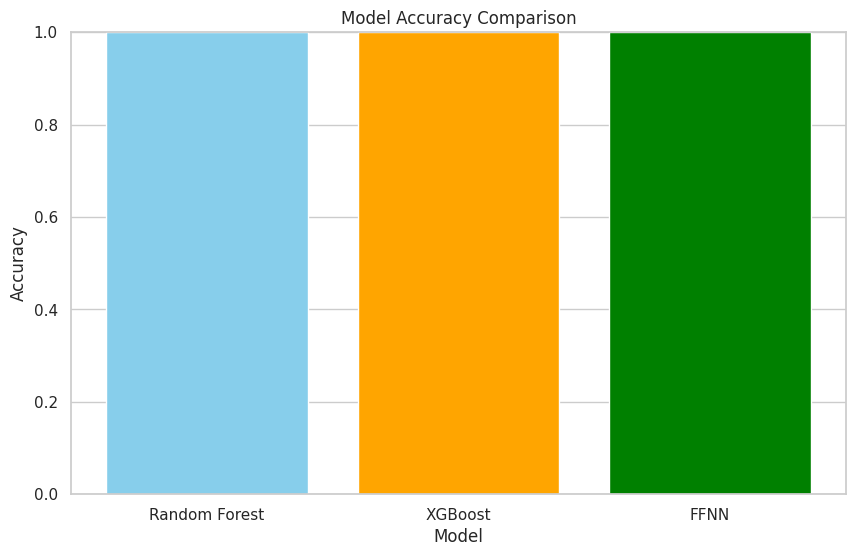

In [33]:
# Menghapus kolom Latitude dan Longitude
df = df.drop(columns=['Latitude', 'Longitude'])

# Menyandikan variabel kategori menggunakan LabelEncoder
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])
df['Season'] = encoder.fit_transform(df['Season'])

# Fitur dan target
X = df[['Location', 'Season', 'Month', 'Year']]
y = df['Season']  # Target adalah musim (Season)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menambahkan StandardScaler untuk menormalisasi data
scaler = StandardScaler()

# Menormalisasi data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Report:")
print(classification_report(y_test, rf_predictions, target_names=encoder.classes_))
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Model XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Report:")
print(classification_report(y_test, xgb_predictions, target_names=encoder.classes_))
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

# Model Feedforward Neural Network (FFNN) menggunakan Sequential
ffnn_model = Sequential()

# Menambahkan layer input dan hidden layers
ffnn_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer dengan 128 neuron
ffnn_model.add(Dense(64, activation='relu'))  # Hidden layer pertama
ffnn_model.add(Dense(32, activation='relu'))  # Hidden layer kedua

# Menambahkan layer output
ffnn_model.add(Dense(len(encoder.classes_), activation='softmax'))  # Jumlah neuron output sesuai dengan kelas target

# Menyusun model
ffnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training FFNN model
ffnn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluasi model
ffnn_loss, ffnn_accuracy = ffnn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Feedforward Neural Network Accuracy: {ffnn_accuracy:.2f}")

# Prediksi FFNN
ffnn_predictions = ffnn_model.predict(X_test_scaled)
ffnn_predictions = ffnn_predictions.argmax(axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Print classification report untuk FFNN
print("Feedforward Neural Network Report:")
print(classification_report(y_test, ffnn_predictions, target_names=encoder.classes_))

# Plotting hasil akurasi
models = ['Random Forest', 'XGBoost', 'FFNN']
accuracies = [rf_accuracy, xgb_accuracy, ffnn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


<ipython-input-34-a7e62c584d20>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Month", y="Visit_Count", hue="Location", data=filtered_data, ci=None)


<ipython-input-34-a7e62c584d20>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Year", y="Visit_Count", hue="Location", data=filtered_data, ci=None)


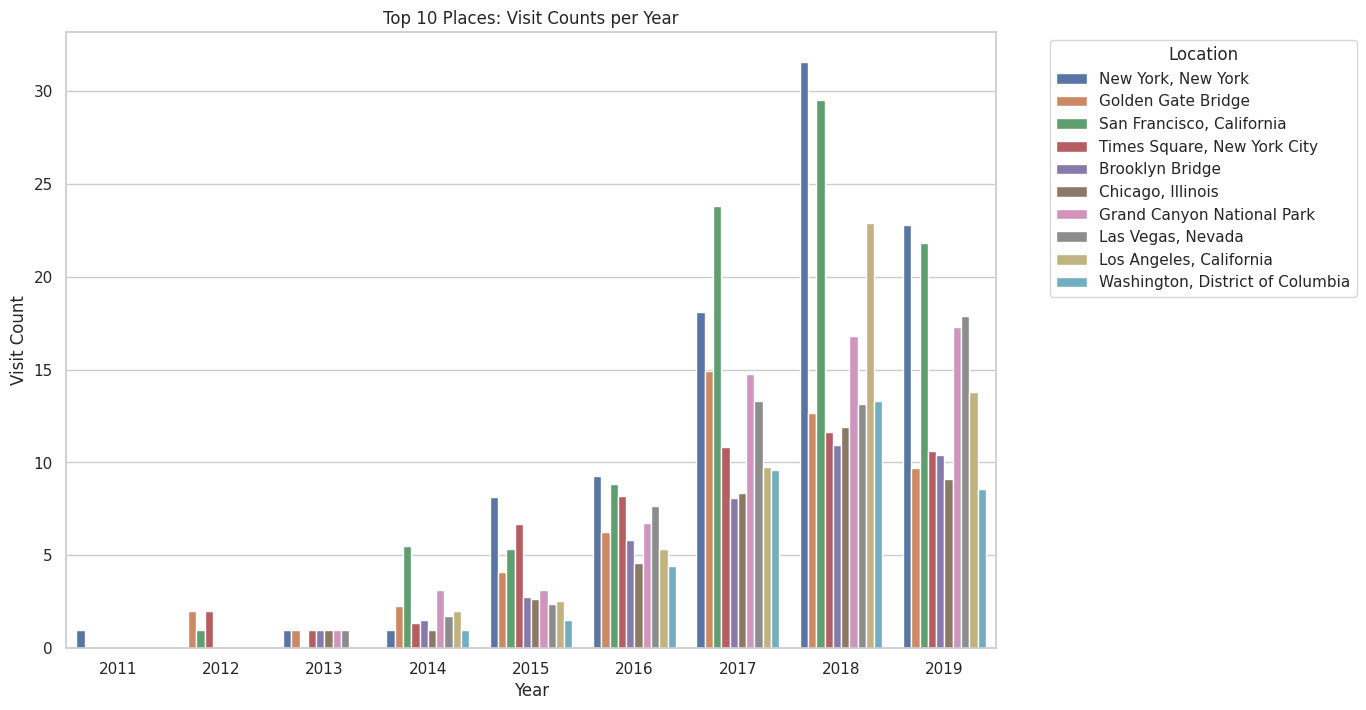

Top 10 Most Visited Places:
                              Location  Visit_Count
7205         San Francisco, California         1052
5755                New York, New York          991
3139        Grand Canyon National Park          684
4707           Los Angeles, California          623
4458                 Las Vegas, Nevada          613
3063                Golden Gate Bridge          574
8620       Times Square, New York City          531
1056                   Brooklyn Bridge          437
9292  Washington, District of Columbia          424
1617                 Chicago, Illinois          409


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah kunjungan per tempat, bulan, dan tahun
top_places = data.groupby(['Location', 'Month', 'Year']).size().reset_index(name='Visit_Count')

# Menentukan 10 tempat teratas berdasarkan jumlah kunjungan
top_10_places = top_places.groupby('Location').sum().sort_values(by='Visit_Count', ascending=False).head(10).index

# Filter data untuk hanya mencakup 10 tempat teratas
filtered_data = top_places[top_places['Location'].isin(top_10_places)]

# Plotting jumlah kunjungan per bulan untuk 10 tempat teratas
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(x="Month", y="Visit_Count", hue="Location", data=filtered_data, ci=None)

plt.title('Top 10 Places: Visit Counts per Month')
plt.xlabel('Month')
plt.ylabel('Visit Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Plotting jumlah kunjungan per tahun untuk 10 tempat teratas
plt.figure(figsize=(12, 8))
sns.barplot(x="Year", y="Visit_Count", hue="Location", data=filtered_data, ci=None)

plt.title('Top 10 Places: Visit Counts per Year')
plt.xlabel('Year')
plt.ylabel('Visit Count')
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Menampilkan daftar tempat yang sering dikunjungi
top_places_summary = top_places.groupby('Location').agg({'Visit_Count': 'sum'}).reset_index()
top_places_summary = top_places_summary.sort_values(by='Visit_Count', ascending=False).head(10)

print("Top 10 Most Visited Places:")
print(top_places_summary)


In [35]:
import joblib

# Menyimpan encoder untuk lokasi dan musim
joblib.dump(encoder, '/content/drive/MyDrive/Uapp/encoder.pkl')

# Menyimpan StandardScaler
joblib.dump(scaler, '/content/drive/MyDrive/Uapp/scaler.pkl')

# Menyimpan model Random Forest
joblib.dump(rf_model, '/content/drive/MyDrive/Uapp/rf_model.pkl')

# Menyimpan model XGBoost
joblib.dump(xgb_model, '/content/drive/MyDrive/Uapp/xgb_model.pkl')

# Menyimpan model FFNN
ffnn_model.save('/content/drive/MyDrive/Uapp/ffnn_model.h5')
